Import useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf 

Functions for normalizing distance and angle

In [2]:
def normalize1(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = 500 - 0   
    for i in arr:
        temp = (((i - 0)*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

def normalize2(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = math.radians(360) - math.radians(0)   
    for i in arr:
        temp = (((i - 0)*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

Get input data and print the data size

In [3]:
d = [i for i in range(30, 500, 10)]
theta = [i for i in range(0, 360, 10)]

d_list = []
theta_list = []
for i in d:
    for j in theta:
        d_list.append(i)
        theta_list.append(math.radians(j))
        
df = pd.read_csv(r"C:\Users\KEN\Documents\SINR1.csv")
SINR = df['SINR']
label = SINR.to_numpy()
range_to_normalize = (0,1)
f1 = normalize1(d_list, range_to_normalize[0], range_to_normalize[1])
f2 = normalize2(theta_list, range_to_normalize[0], range_to_normalize[1])
f = []
for i in range(len(f1)):
    f.append([f1[i], f2[i]])
features = np.array(f)

print(features.shape)
print(label.shape)

(1692, 2)
(1692,)


Train-Test-Validation Split

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

Import keras APIs

In [5]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Activation, BatchNormalization, Lambda, LeakyReLU
from keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau

Model architecture using keras sequential model

In [6]:
model = Sequential()
model.add(Input(shape=(2,)))

model.add(Dense(16))
model.add(Activation('tanh'))
model.add(Dense(32))
model.add(Activation('tanh'))
# model.add(Dense(32))
# model.add(Activation('tanh'))
# model.add(Dense(64))
# model.add(Activation('tanh'))
# model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dense(128))
model.add(Dropout(0.3))

model.add(Activation('softplus'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8

Visualize the DNN Model

In [7]:
# from ann_visualizer.visualize import ann_viz
# ann_viz(model, view=True, title="Model Architecture")

Training the model

In [8]:
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.9)
# opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer='adam', loss='mse')
losses = model.fit(x_train, y_train, 
                   validation_data=(x_val, y_val),
                   batch_size=8, 
                   epochs=400
                   )

Epoch 1/400
153/153 [==============================] - 2s 3ms/step - loss: 121.7118 - val_loss: 22.9203
Epoch 2/400
153/153 [==============================] - 0s 2ms/step - loss: 9.4786 - val_loss: 2.0612
Epoch 3/400
153/153 [==============================] - 0s 2ms/step - loss: 3.1371 - val_loss: 1.2164
Epoch 4/400
153/153 [==============================] - 0s 2ms/step - loss: 2.8630 - val_loss: 1.3254
Epoch 5/400
153/153 [==============================] - 0s 2ms/step - loss: 2.5058 - val_loss: 1.2474
Epoch 6/400
153/153 [==============================] - 0s 2ms/step - loss: 2.3318 - val_loss: 1.0263
Epoch 7/400
153/153 [==============================] - 0s 2ms/step - loss: 2.2258 - val_loss: 1.0865
Epoch 8/400
153/153 [==============================] - 0s 2ms/step - loss: 2.0689 - val_loss: 0.8058
Epoch 9/400
153/153 [==============================] - 0s 2ms/step - loss: 2.2153 - val_loss: 0.6776
Epoch 10/400
153/153 [==============================] - 0s 2ms/step - loss: 2.0371 - val

153/153 [==============================] - 0s 2ms/step - loss: 0.6676 - val_loss: 0.2145
Epoch 82/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5639 - val_loss: 0.3970
Epoch 83/400
153/153 [==============================] - 0s 2ms/step - loss: 0.7233 - val_loss: 0.0582
Epoch 84/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5686 - val_loss: 0.3599
Epoch 85/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5577 - val_loss: 0.5090
Epoch 86/400
153/153 [==============================] - 0s 2ms/step - loss: 0.7474 - val_loss: 0.1768
Epoch 87/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5551 - val_loss: 0.1017
Epoch 88/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5330 - val_loss: 0.3703
Epoch 89/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5290 - val_loss: 0.1164
Epoch 90/400
153/153 [==============================] - 0s 2ms/step - loss: 0.6060 - val_loss: 

Epoch 161/400
153/153 [==============================] - 0s 2ms/step - loss: 0.4881 - val_loss: 0.2426
Epoch 162/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5554 - val_loss: 0.2856
Epoch 163/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5217 - val_loss: 0.3103
Epoch 164/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5171 - val_loss: 0.2940
Epoch 165/400
153/153 [==============================] - 0s 2ms/step - loss: 0.6191 - val_loss: 0.2765
Epoch 166/400
153/153 [==============================] - 0s 2ms/step - loss: 0.4418 - val_loss: 0.1316
Epoch 167/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5645 - val_loss: 0.6052
Epoch 168/400
153/153 [==============================] - 0s 2ms/step - loss: 0.6689 - val_loss: 0.1105
Epoch 169/400
153/153 [==============================] - 0s 2ms/step - loss: 0.4571 - val_loss: 0.3748
Epoch 170/400
153/153 [==============================] - 0s 2ms/step - lo

153/153 [==============================] - 0s 2ms/step - loss: 0.5554 - val_loss: 0.1409
Epoch 241/400
153/153 [==============================] - 0s 2ms/step - loss: 0.4923 - val_loss: 0.4369
Epoch 242/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5124 - val_loss: 0.1402
Epoch 243/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5527 - val_loss: 0.0863
Epoch 244/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5290 - val_loss: 0.0829
Epoch 245/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5200 - val_loss: 0.3785
Epoch 246/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5044 - val_loss: 0.2335
Epoch 247/400
153/153 [==============================] - 0s 2ms/step - loss: 0.4670 - val_loss: 0.0797
Epoch 248/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5202 - val_loss: 0.2121
Epoch 249/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5492 - v

153/153 [==============================] - 0s 2ms/step - loss: 0.4371 - val_loss: 0.0915
Epoch 320/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5273 - val_loss: 0.1540
Epoch 321/400
153/153 [==============================] - 0s 2ms/step - loss: 0.4938 - val_loss: 0.2241
Epoch 322/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5613 - val_loss: 0.0689
Epoch 323/400
153/153 [==============================] - 0s 2ms/step - loss: 0.4854 - val_loss: 0.2231
Epoch 324/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5089 - val_loss: 0.1382
Epoch 325/400
153/153 [==============================] - 0s 2ms/step - loss: 0.4405 - val_loss: 0.3529
Epoch 326/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5009 - val_loss: 0.7336
Epoch 327/400
153/153 [==============================] - 0s 2ms/step - loss: 0.4998 - val_loss: 0.1812
Epoch 328/400
153/153 [==============================] - 0s 2ms/step - loss: 0.4841 - v

153/153 [==============================] - 0s 2ms/step - loss: 0.5540 - val_loss: 0.1582
Epoch 399/400
153/153 [==============================] - 0s 2ms/step - loss: 0.5387 - val_loss: 0.0876
Epoch 400/400
153/153 [==============================] - 0s 2ms/step - loss: 0.4613 - val_loss: 0.2085


Testing the model on test data obtained using split

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
y_pred = model.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
print("MSE = ",MSE)
R2 = r2_score(y_test, y_pred)
print("R2 score = ",R2)

11/11 [==============================] - 0s 2ms/step
MSE =  0.21635765801027576
R2 score =  0.9977883405731713


Plot MSE vs Epochs

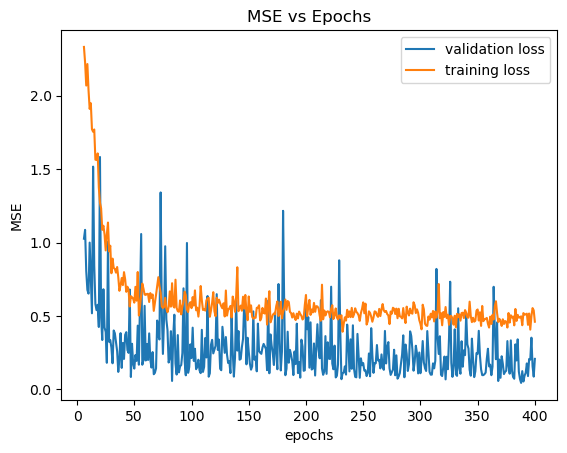

In [10]:
from keras.callbacks import History
history = History()
l1 = losses.history['val_loss']
l2 = losses.history['loss']
epoch = [i for i in range(1, 401)]
plt.plot(epoch[5:], l1[5:] , label='validation loss')
plt.plot(epoch[5:], l2[5:] , label='training loss')
plt.title('MSE vs Epochs')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Getting test data from csv, normalizing it to get test data

In [11]:
dft = pd.read_csv(r"C:\Users\KEN\Documents\SINRt1.csv")
SINRt = dft['SINR']
act = SINRt.to_numpy()

dt = [35, 295, 495]
theta_t = [2, 15, 36, 55, 75, 102, 119, 125, 147, 155, 174, 205, 213, 236, 255, 295, 311 ,331, 343, 355]

d_tlist = []
theta_tlist = []
for i in dt:
    for j in theta_t:
        d_tlist.append(i)
        theta_tlist.append(math.radians(j))

ft1 = normalize1(d_tlist, range_to_normalize[0], range_to_normalize[1])
ft2 = normalize2(theta_list, range_to_normalize[0], range_to_normalize[1])
ft = []
for i in range(len(ft1)):
    ft.append([ft1[i], ft2[i]])
test = np.array(ft)

Obtain predicted data and Measures

In [12]:
pred = model.predict(test)
MSE = mean_squared_error(act,pred)
print("MSE = ",MSE)
R2 = r2_score(pred, act)
print("R2 score = ",R2)

2/2 [==============================] - 0s 6ms/step
MSE =  0.4711526894386601
R2 score =  0.9977807268876355


Plot for d = 495 m

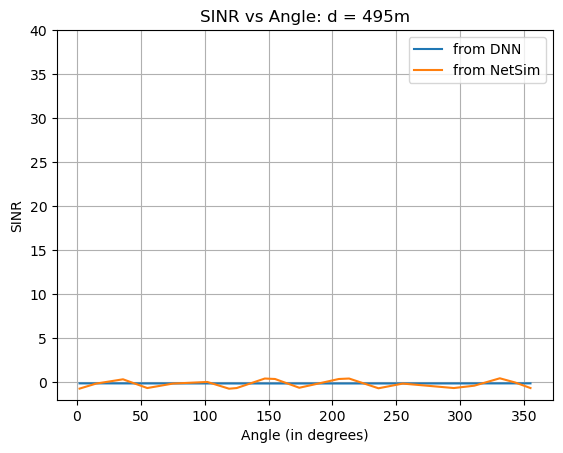

0.20796345146398978
-0.02017045598398637


In [13]:
actual_SINR = list(act)
pred_SINR = list(pred)

plt.plot(theta_t, pred_SINR[40:], label='from DNN')
plt.plot(theta_t, actual_SINR[40:], label='from NetSim')
plt.xlabel('Angle (in degrees)')
plt.ylabel('SINR')
plt.title('SINR vs Angle: d = 495m')
#plt.xticks([2, 15, 36, 55, 75, 102, 119, 125, 147, 155, 174, 205, 213, 236, 255, 295, 311 ,331, 343, 355], rotation = 90)
plt.ylim(-2, 40)
plt.grid()
plt.legend()
plt.show()

print(mean_squared_error(np.array(actual_SINR[40:]), np.array(pred_SINR[40:])))
print(r2_score(np.array(actual_SINR[40:]), np.array(pred_SINR[40:])))

Plot for d = 295 m

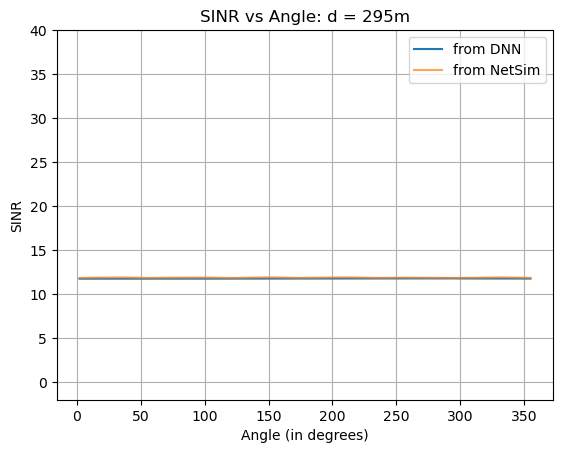

0.010536810222323664
-14.261692731985297


In [14]:
plt.plot(theta_t, pred_SINR[20:40], label='from DNN')
plt.plot(theta_t, actual_SINR[20:40], label='from NetSim', alpha=0.7)
plt.xlabel('Angle (in degrees)')
plt.ylabel('SINR')
plt.title('SINR vs Angle: d = 295m')
#plt.xticks([2, 15, 36, 55, 75, 102, 119, 125, 147, 155, 174, 205, 213, 236, 255, 295, 311 ,331, 343, 355], rotation = 90)
plt.ylim(-2, 40)
plt.grid()
plt.legend()
plt.show()

print(mean_squared_error(actual_SINR[20:40], pred_SINR[20:40]))
print(r2_score(actual_SINR[20:40], pred_SINR[20:40]))

Plot for d = 35 m

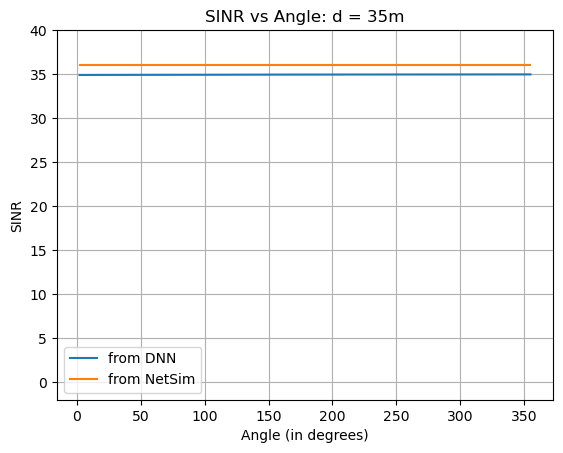

1.194957806629667
-1738120443555.0999


In [15]:
plt.plot(theta_t, pred_SINR[:20], label='from DNN')
plt.plot(theta_t, actual_SINR[:20], label='from NetSim')
plt.xlabel('Angle (in degrees)')
plt.ylabel('SINR')
plt.title('SINR vs Angle: d = 35m')
#plt.xticks([2, 15, 36, 55, 75, 102, 119, 125, 147, 155, 174, 205, 213, 236, 255, 295, 311 ,331, 343, 355], rotation = 90)
plt.ylim(-2, 40)
plt.grid()
plt.legend()
plt.show()

print(mean_squared_error(actual_SINR[:20], pred_SINR[:20]))
print(r2_score(actual_SINR[:20], pred_SINR[:20]))

Plot for SINR vs Angle for fixed distance

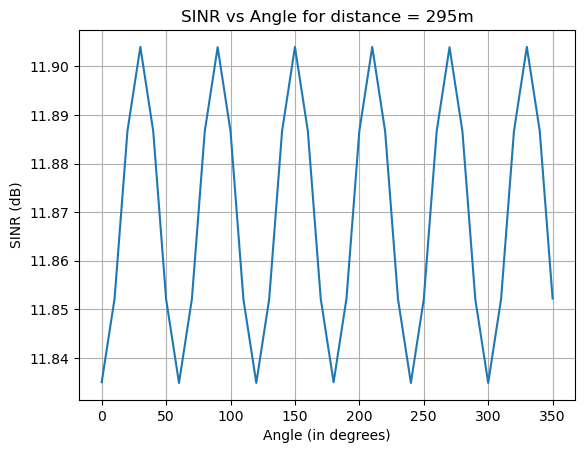

In [16]:
dfp = pd.read_csv(r"C:\Users\KEN\Documents\SINRt.csv")
SINRp = dfp['SINR'].to_list()

#dp = [295 for i in range(0, 360, 10)]
theta_p = [i for i in range(0, 360, 10)]

plt.plot(theta_p, SINRp[36:72])
plt.title('SINR vs Angle for distance = 295m')
plt.xlabel('Angle (in degrees)')
plt.ylabel('SINR (dB)')
plt.grid()
plt.show()

Plot for SINR vs Distance for fixed angle

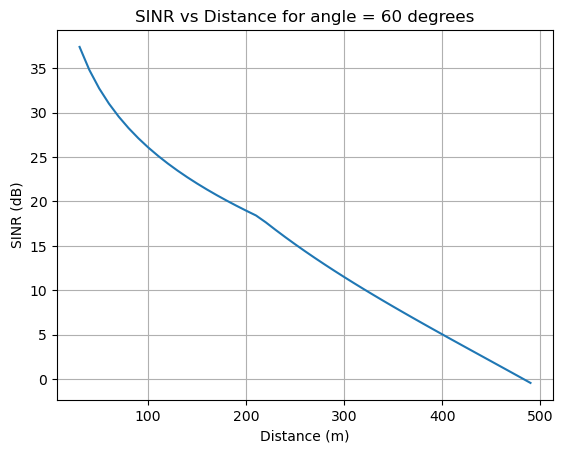

In [17]:
dfd = pd.read_csv(r"C:\Users\KEN\Documents\SINRp.csv")
SINRd = dfd['SINR'].to_list()

#dp = [295 for i in range(0, 360, 10)]
d_p = [i for i in range(30, 500, 10)]

plt.plot(d_p, SINRd)
plt.title('SINR vs Distance for angle = 60 degrees')
plt.xlabel('Distance (m)')
plt.ylabel('SINR (dB)')
plt.grid()
plt.show()

Test for 3 distances with angle from 0 to 360 degrees, incrementing by 10 degrees

In [18]:
dft = pd.read_csv(r"C:\Users\KEN\Documents\SINRt.csv")
SINRt = dft['SINR']
act = SINRt.to_numpy()

dt = [35, 295, 495]
theta_t = [i for i in range(0, 360, 10)]

d_tlist = []
theta_tlist = []
for i in dt:
    for j in theta_t:
        d_tlist.append(i)
        theta_tlist.append(math.radians(j))

ft1 = normalize1(d_tlist, range_to_normalize[0], range_to_normalize[1])
ft2 = normalize2(theta_list, range_to_normalize[0], range_to_normalize[1])
ft = []
for i in range(len(ft1)):
    ft.append([ft1[i], ft2[i]])
test = np.array(ft)

pred = model.predict(test)
MSE = mean_squared_error(act,pred)
print("MSE = ",MSE)
R2 = r2_score(pred, act)
print("R2 score = ",R2)

4/4 [==============================] - 0s 2ms/step
MSE =  0.4515329929201512
R2 score =  0.9978734756522354


Plot

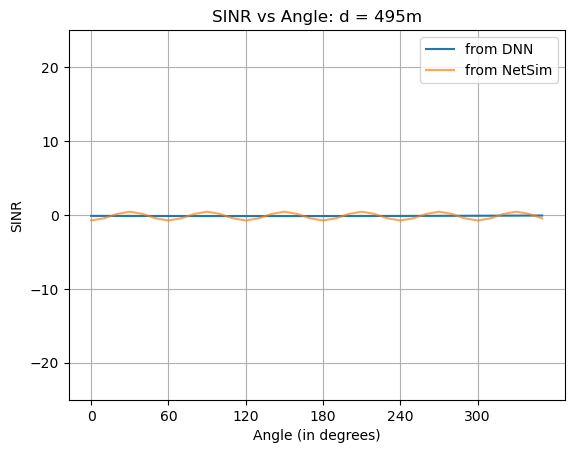

In [19]:
actual_SINR = list(act)
pred_SINR = list(pred)

plt.plot(theta_t, pred_SINR[72:], label='from DNN')
plt.plot(theta_t, actual_SINR[72:], label='from NetSim', alpha=0.7)
plt.xlabel('Angle (in degrees)')
plt.ylabel('SINR')
plt.title('SINR vs Angle: d = 495m')
plt.xticks([i for i in range(0, 360, 60)])
plt.ylim(-25, 25)
plt.grid()
plt.legend()
plt.show()

# print(mean_squared_error(actual_SINR[20:40], pred_SINR[20:40]))
# print(r2_score(actual_SINR[20:40], pred_SINR[20:40]))

Coefficient of variation

In [20]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) 

cv(actual_SINR)

0.9502941877287925

R2 score for the test data

In [21]:
R2 = r2_score(pred_SINR[72:], actual_SINR[72:])
print(R2)

-401.59615863036373
